# Decision Trees

In [1]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

É possível visualizar a árvore de decisão treinada usando o método export_graphviz(). 
OBS: Verifique se o pacote está instalado

In [4]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return os.path.join(IMAGES_PATH, fig_id)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Agora, vá em File -> New -> Terminal:

1. Navegue até a pasta onde o arquivo ires_tree.dot foi gerado 
2. Execute o seguinte código: dot -Tpng .\iris_tree.dot -o iris_tree.png

Isso vai gerar um arquivo png que mostrará como ficou nossa árvore. Vou adicioná-la aqui para facilitar nosso entendimento

<img src="iris_tree.png" />

### Como o classificador realiza novas predições?

- Começando pela raiz, verifique se o comprimento da pétala é menor que 2.45cm.

    - Se for, vá para o nó da esquerda. Como é um nó folha, a árvore prediz que a classe é setosa
    
    - Se não, vá para o nó da direita. Verifique se a largura da folha é menor que 1.75cm.
    
        - Se for, vá para o nó folha da esquerda. A flor será classificada como versicolor
        
        - Se não, vá para o nó folha da direita. A flor será classificada como virginica

### Desicion Boundaries
É possível verificar as fronteiras de decisão que o arquivo encontrou na construção da árvore. O código abaixo nos fornece uma visualização. 

Matplotlib is building the font cache; this may take a moment.


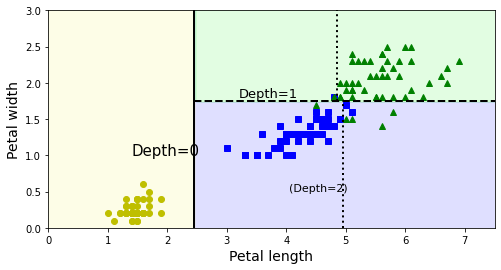

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

A linha mais grossa representa a fronteira de decisão do nó raiz: petal length = 2.45cm. Como a área à esquerda é pura, não há mais splits. Entretanto, a área à direita é impura, então o nó é dividido quando petal eidth = 1.75cm. Visto que max_depth=2, Decision Tree para aqui. 

### Estimando as probabilidades das classes

Uma Árvore de Decisão pode estimar a probabilidade de uma instância pertencer a uma classe particular. Suponha que uma flor tenha 5cm de comprimento e 1.5cm de largura. O nó correspondente seria o Depth-2 a esquerda. Nesse caso, a Árvore retornaria as seguintes probabilidades:

- 0% parra *Iris Setosa* (0/54)
- 90.7% para *Iris Versicolor* (49/54)
- 9.3% para Iris Virginica* (5/54)

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

E se você solicitar a predição da classe, o algoritmo retornará *Iris versicolor* (classe 1), visto que ela possui a maior probabilidade:

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

### Regularização dos Hiperparâmetros

Árvores de decisão assumem poucas suposições acerca dos dados de treinamento (ao contrário dos modelos lineares, que assumem que os dados são lineares). Se deixada sem restrição, a árvore irá se adaptar aos dados de treino, dando um fit muito próximo (na verdade, overfit). 

Tais modelos são chamados não-paramétricos, mas não porque não possuem parâmetros (ou hiperparâmetros), mas porque o número de parâmetros não é determinado antes do treino.

PAra evitar overfitting, é preciso restringir a liberdade da Árvore de Decisão durante o treinamento. Isto é chamado de regularização. Alguns hiperparâmetros que podem ser ajustados para evitar overfitting numa Árvore de decisão:

- max_depth (profundidade máxima da árvore - delimita o número de splits)
- min_samples_split (número mínimo de amostras que um nó deve ter antes do split)
- min_sampes_leaf (número mínimo de amostras que um nó folha deve ter)

O código abaixo apresenta duas Árvores treinadas no dataset moons. A da esquerda foi treinada com hiperparâmetros padrões (sem restrições), enquanto a da direita foi regularizada (min_samples_leaf=4). 

Podemos observar que o modelo da esquerda está dando overfiting e que o modelo da direita irá generalizar melhor. 

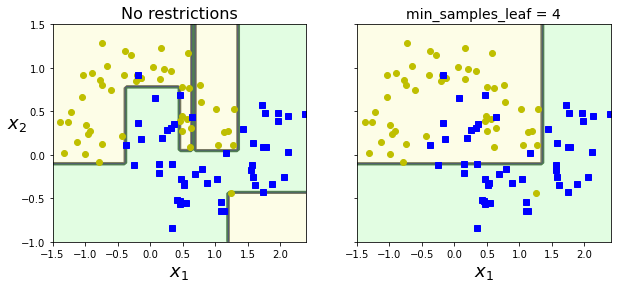

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,max_depth=3, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

# Formas de Validação - k-fold

In [10]:
import pandas as pd
import numpy as np

In [11]:
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Quando olhamos para o dataset, vemos a coluna 'education' e 'education_num'. A última é a versão numérica da primeira. Assim, podemos dropar 'education'. 

In [13]:
df_census = df_census.drop(['education'], axis=1)

Todas as colunas precisam ser transformadas em colunas numéricas. O método *get_dumies* do pandas pega valores únicos não-numéricos de cada coluna e os converte em colunas, com 1 indicando presença e 0 ausência. Veja o exemplo 

In [14]:
#exemplo
pd.get_dummies(df_census['marital-status'])

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,1
32559,0,0,0,0,1,0,0


In [15]:
df_census = pd.get_dummies(df_census)
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


O objetivo (coluna target) é determinar se uma pessoa ganha mais que 50k ou não. Depois do pd.get_dummies, duas colunas, df_census['income_<=50k'] e df_census['income_>50k] são usadas para determinar se uma pessoa ganha 50k. Visto que ambas representam a mesma coisa, vamos deletar a primeira

In [16]:
df_census = df_census.drop('income_ <=50K', axis=1)

In [17]:
#features e labels
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

In [18]:
from sklearn.model_selection import cross_val_score
#uma função para executar cross-validation
def cross_val(classifier, num_splits=10):
    model = classifier
    scores = cross_val_score(model, X, y, cv=num_splits)
    print('Accuracy:', np.round(scores, 2))
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [19]:
cross_val((DecisionTreeClassifier()))

Accuracy: [0.81 0.81 0.82 0.81 0.82 0.82 0.83 0.82 0.84 0.81]
Accuracy mean: 0.82


# KNN

In [20]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos ver como a escolha do <b>K</b> é importante para o resultado do algoritmo.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Primeiro lemos a base, visualizamos e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada classe na visualização do modelo

In [23]:
baseDados = pd.read_csv('bases/base_knn.csv')
baseDados

,X1,X2,Y
0,0.0,0.0,0
1,0.5,0.4,0
2,0.6,0.0,0
3,0.7,0.3,0
4,1.8,2.1,0
5,1.9,1.9,0
6,2.0,1.8,0
7,2.1,2.0,0
8,3.0,4.9,1
9,3.3,5.1,1


In [24]:
h = .01
x_min, x_max = baseDados.X1.min() - 1, baseDados.X1.max() + 1
y_min, y_max = baseDados.X2.min() - 1, baseDados.X2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #Return coordinate matrices from coordinate vectors.
print(xx)
yy

[[-1.   -0.99 -0.98 ...  6.57  6.58  6.59]
 [-1.   -0.99 -0.98 ...  6.57  6.58  6.59]
 [-1.   -0.99 -0.98 ...  6.57  6.58  6.59]
 ...
 [-1.   -0.99 -0.98 ...  6.57  6.58  6.59]
 [-1.   -0.99 -0.98 ...  6.57  6.58  6.59]
 [-1.   -0.99 -0.98 ...  6.57  6.58  6.59]]


array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       ...,
       [ 6.17,  6.17,  6.17, ...,  6.17,  6.17,  6.17],
       [ 6.18,  6.18,  6.18, ...,  6.18,  6.18,  6.18],
       [ 6.19,  6.19,  6.19, ...,  6.19,  6.19,  6.19]])

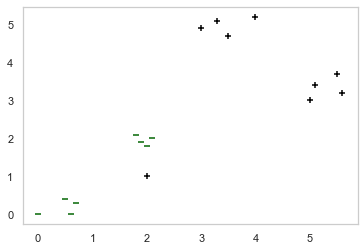

In [25]:


plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = '+')

In [26]:
np.c_[xx.ravel(), yy.ravel()]

array([[-1.  , -1.  ],
       [-0.99, -1.  ],
       [-0.98, -1.  ],
       ...,
       [ 6.57,  6.19],
       [ 6.58,  6.19],
       [ 6.59,  6.19]])

Agora treinamos o algoritmo KNN e exibimos a função de decisão (modelo) gerada pelo algoritmo.

<b>Os círculos são novos pontos que desejamos classificar como negativo ou positivo.</b>

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


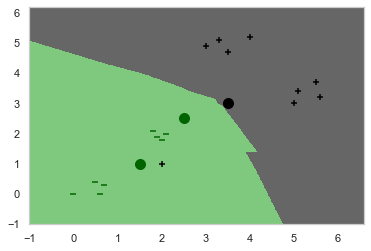

In [29]:
KNN = KNeighborsClassifier(n_neighbors = 3)
X = baseDados[['X1','X2']]
Y = baseDados.Y
KNN.fit(X,Y)

Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = KNN.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '_')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = '+')
plt.scatter([2.5],[2.5], s = 100, c = 'darkgreen' if KNN.predict([[2.5,2.5]]) == 0 else 'black')
plt.scatter([1.5],[1.0], s = 100, c = 'darkgreen' if KNN.predict([[1.5,1.0]]) == 0 else 'black')
plt.scatter([3.5],[3.0], s = 100, c = 'darkgreen' if KNN.predict([[3.5,3.0]]) == 0 else 'black')